<a href="https://colab.research.google.com/github/vkvinay0627/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Libraries**


Install Libraries

In [286]:
import pandas as pd
import numpy as np
from numpy import *
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
from scipy import signal
from matplotlib import *
from pandas import DataFrame
import datetime as dt
import os
from pandas import DataFrame
from ipywidgets import interact, interactive, fixed, interact_manual 
plt.style.use('fivethirtyeight')
from google.colab import files

import datetime as dt
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual,HBox,fixed
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
df1=pd.read_csv("/content/drive/MyDrive/Almabetter/SeoulBikeData.csv", encoding= 'unicode_escape')
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [289]:
# statistical info
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [290]:
# datatype info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [291]:
# unique values
df1.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#**Pre-processing**

In [292]:
# check for null values
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [293]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [294]:
df = df1.copy()

In [295]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [296]:
df['day'] = df['Date'].dt.day
df['month_name'] = df['Date'].dt.month_name()
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.day_name()
# df['weekday_num'] = df['Date'].dt.weekday
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


In [297]:
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month_name                     12
month                          12
weekday                         7
dtype: int64

In [298]:
df= df.rename(columns={'Temperature(°C)':'Temp',
                       'Wind speed (m/s)':'Windspeed',
                       'Humidity(%)':'humidity',
                       'Rainfall(mm)' : 'Rainfall'})
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


In [299]:
# # change int columns to category
# cols = ['Seasons','month','hour','holiday','weekday','workingday','weather']

# for col in cols:
#     df[col] = df[col].astype('category')
# df.info()

#**Exploratory Data Analysis**

##Uni-variate Analysis

In [300]:
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


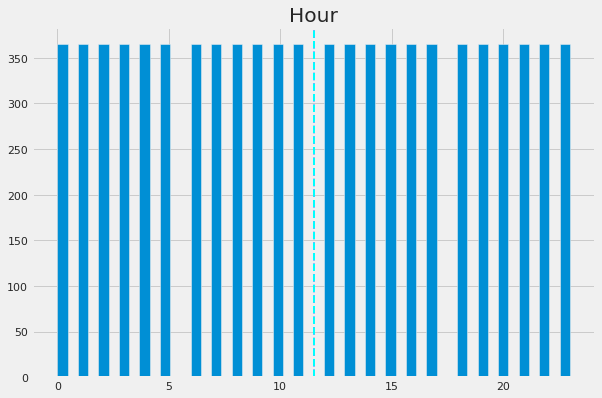

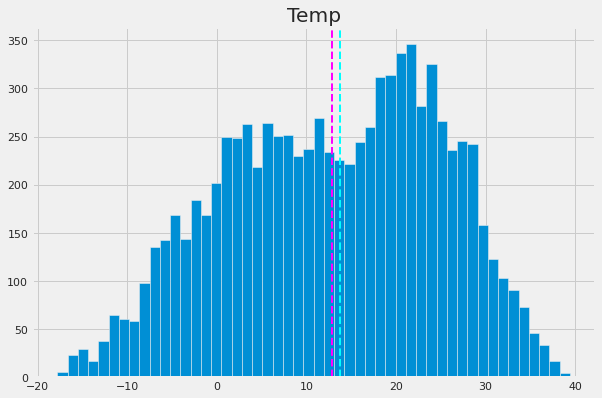

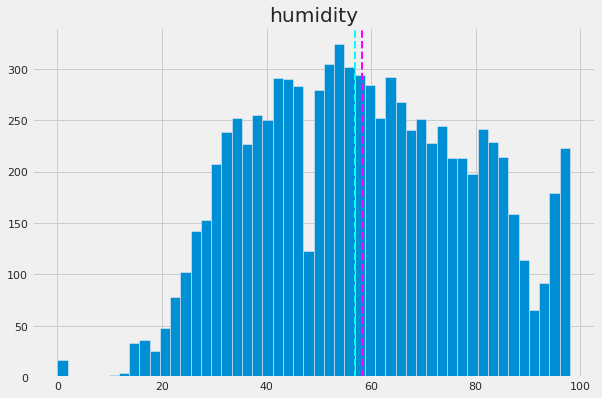

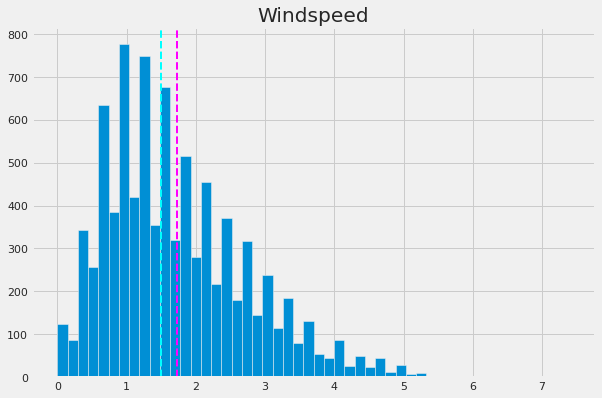

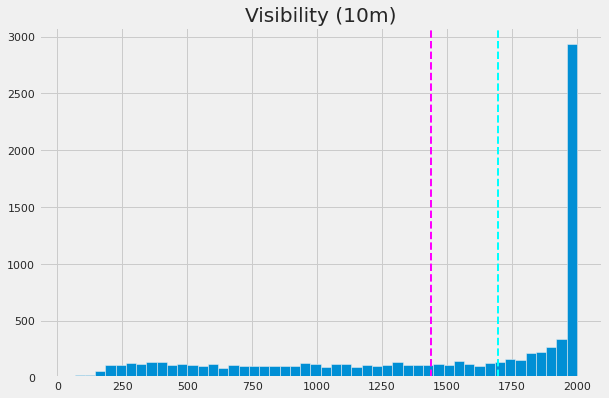

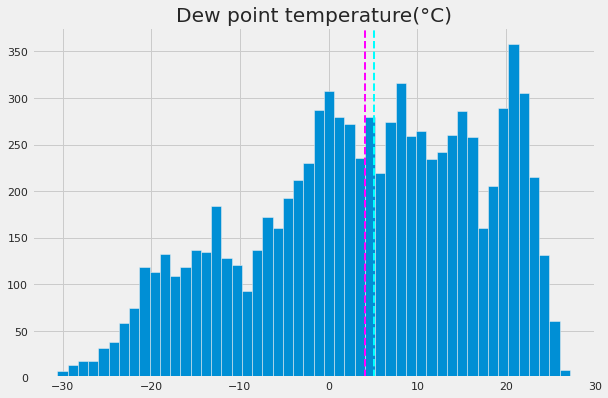

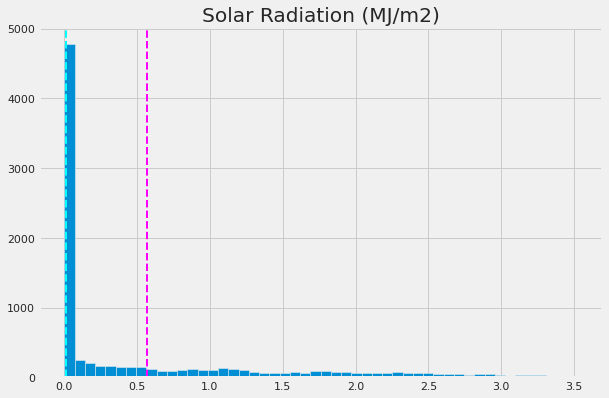

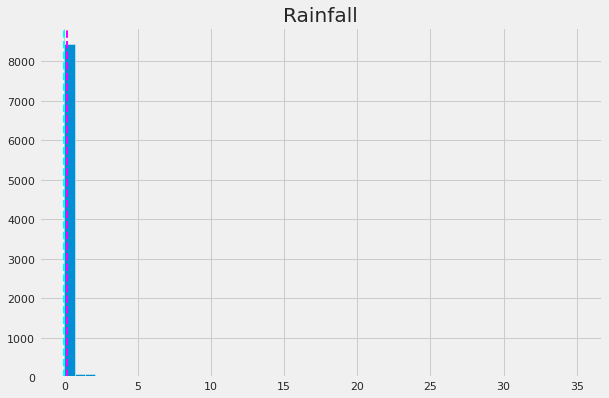

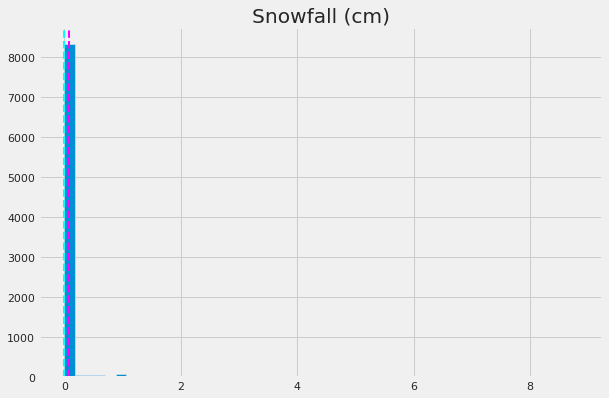

In [301]:
numeric_features = df.iloc[:,[2,3,4,5,6,7,8,9,10]]
numeric_features.head()
# numeric_features[:].head()
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [302]:
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


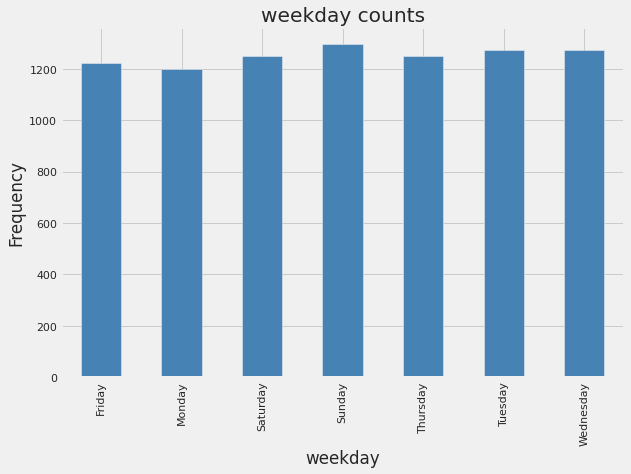

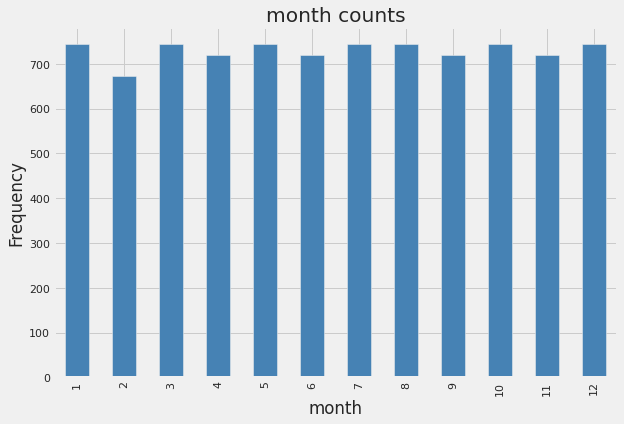

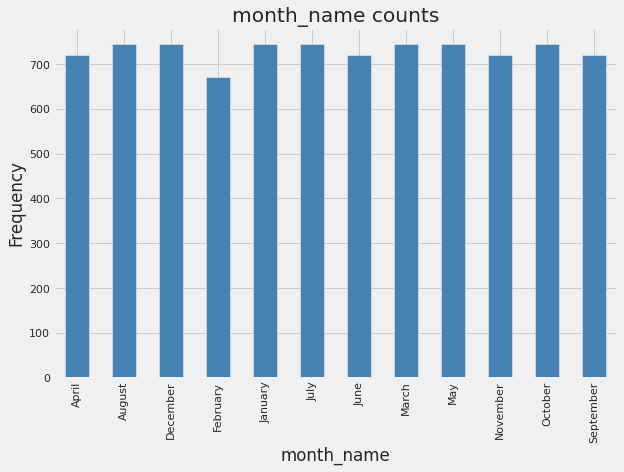

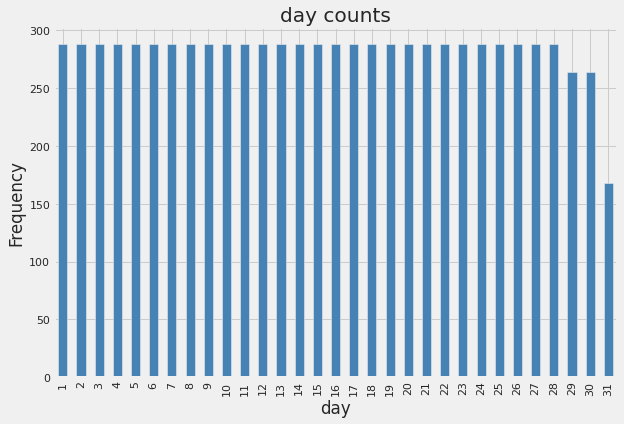

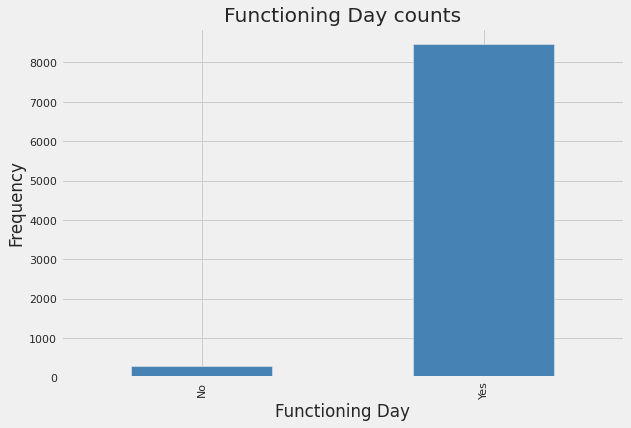

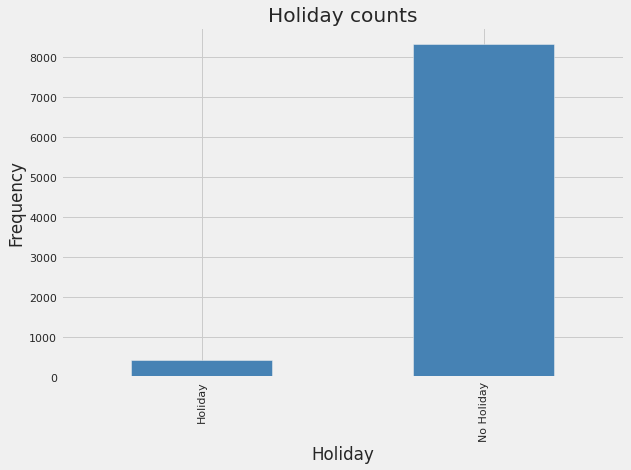

In [303]:
categorical_features = df.iloc[:,[-1,-2,-3,-4,-5,-6]]
categorical_features.head()
# numeric_features[:].head()

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##**Bi-variate and Multi-variate Analysis**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

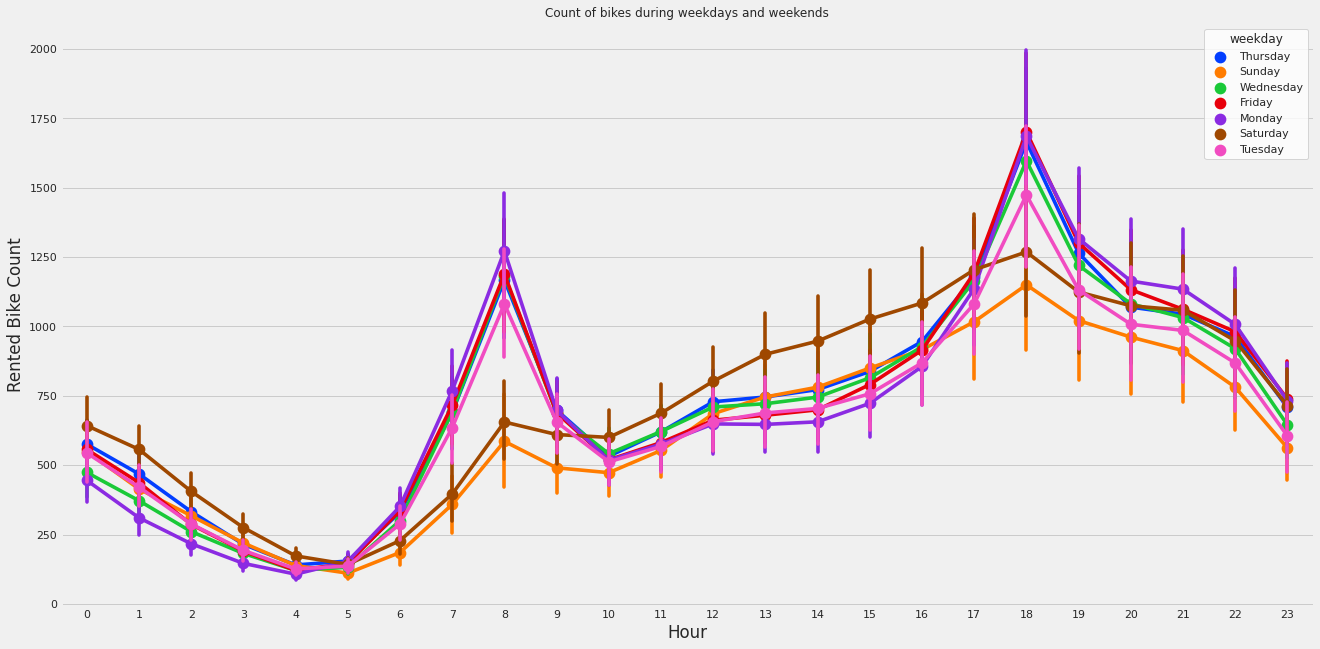

In [304]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='weekday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

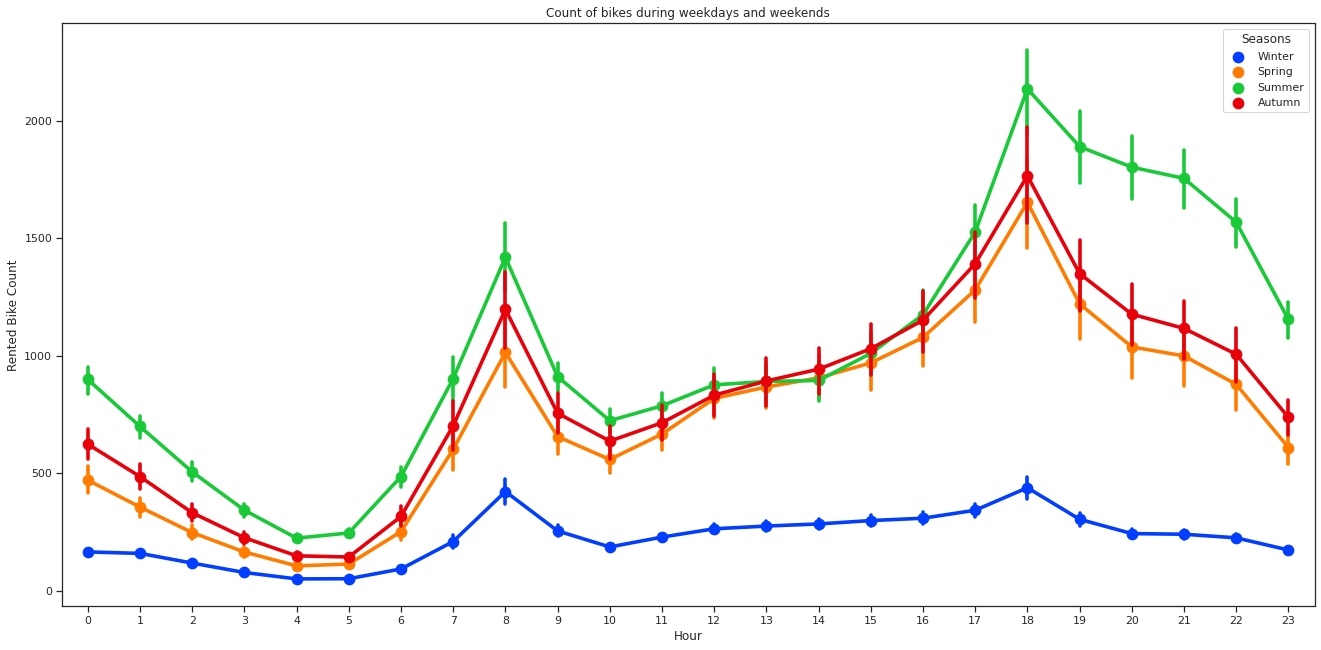

In [305]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

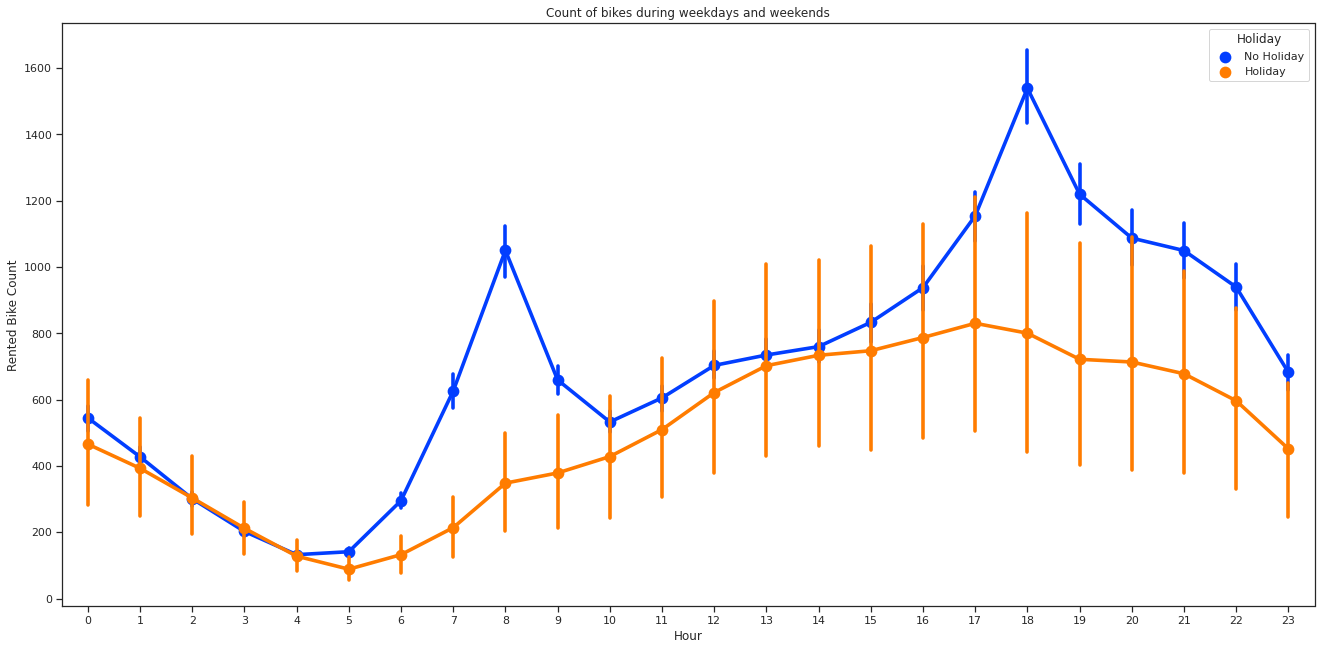

In [306]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

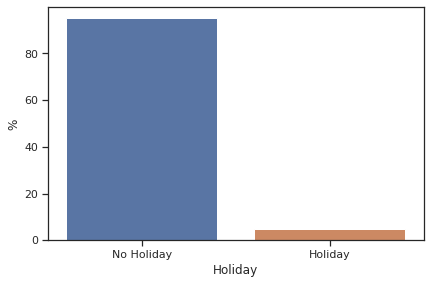

In [307]:
holiday=df['Holiday'].value_counts()
ax=sns.barplot(x=holiday.index,y=(holiday/holiday.sum())*100)
ax.set(xlabel='Holiday', ylabel="%")
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months')]

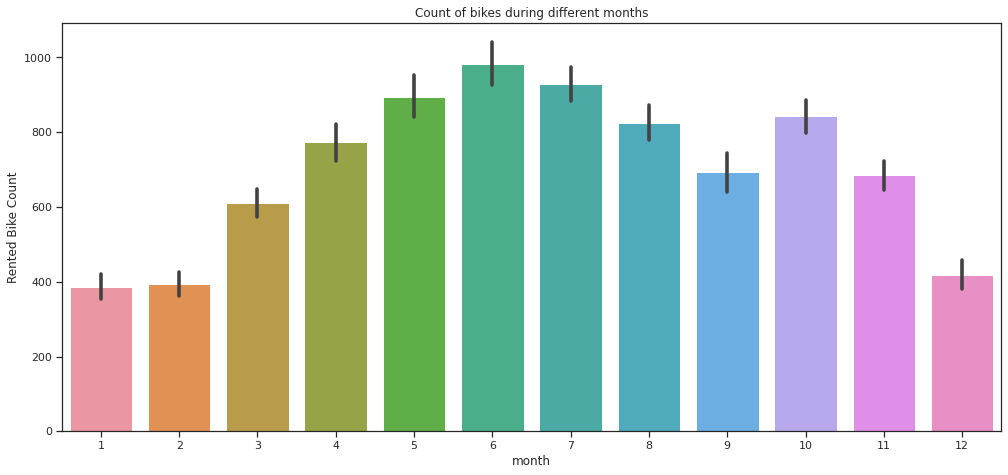

In [308]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='month', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different months')]

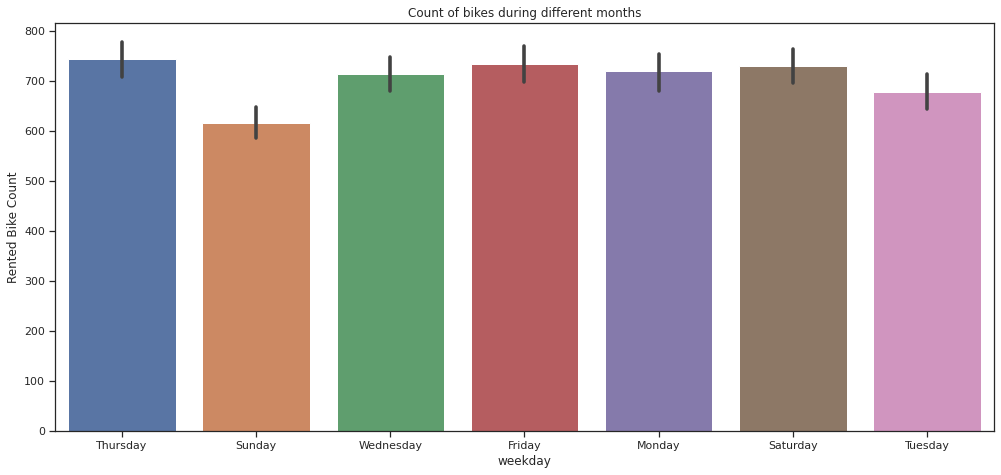

In [309]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='weekday', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temp                       8760 non-null   float64       
 4   humidity                   8760 non-null   int64         
 5   Windspeed                  8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall                   8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [311]:
# # can also be visulaized using histograms for all the continuous variables.
# fig,axes=plt.subplots(2,2)
# axes[0,0].hist(x="Temp",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[0,0].set_title("Variation of temp(Celcius)")
# axes[0,1].hist(x="Rainfall",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[0,1].set_title("Variation of Rainfall(mm)")
# axes[1,0].hist(x="Windspeed",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[1,0].set_title("Variation of windspeed(m/s)")
# axes[1,1].hist(x="humidity",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[1,1].set_title("Variation of humidity(%)")
# fig.set_size_inches(10,10)

#**Feature Engineering**

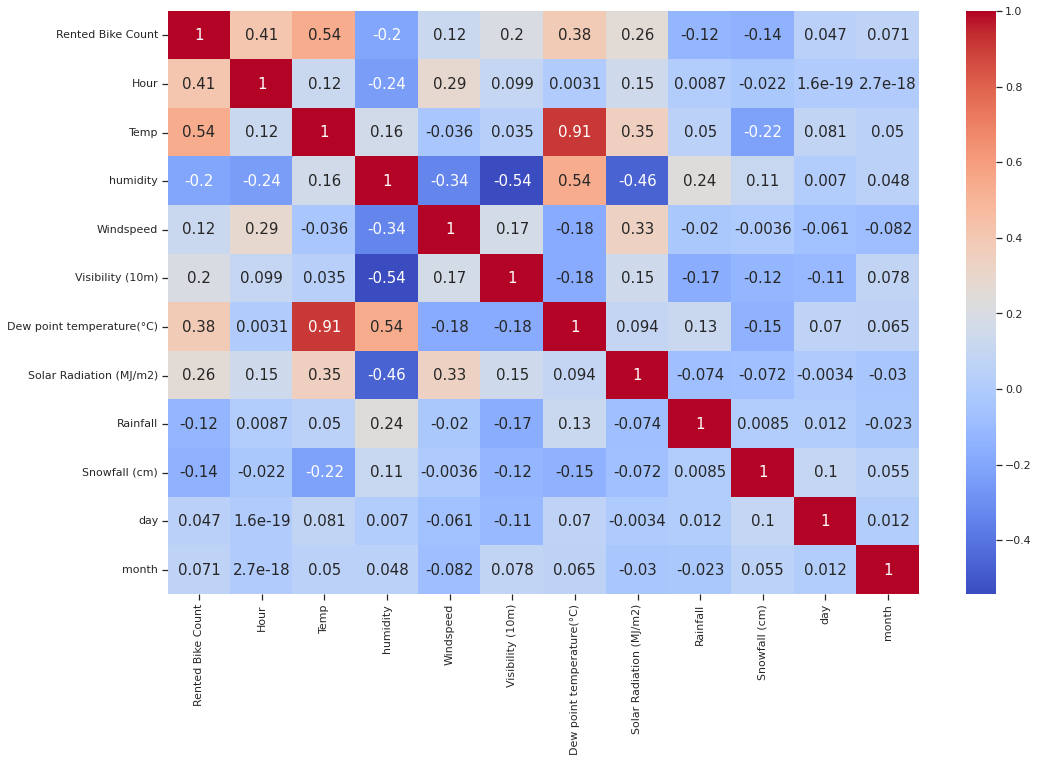

In [312]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temp                       8760 non-null   float64       
 4   humidity                   8760 non-null   int64         
 5   Windspeed                  8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall                   8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [314]:
drop_column = ['Date','Dew point temperature(°C)','month','humidity','month','weekday']
df = df.drop(drop_column,1)

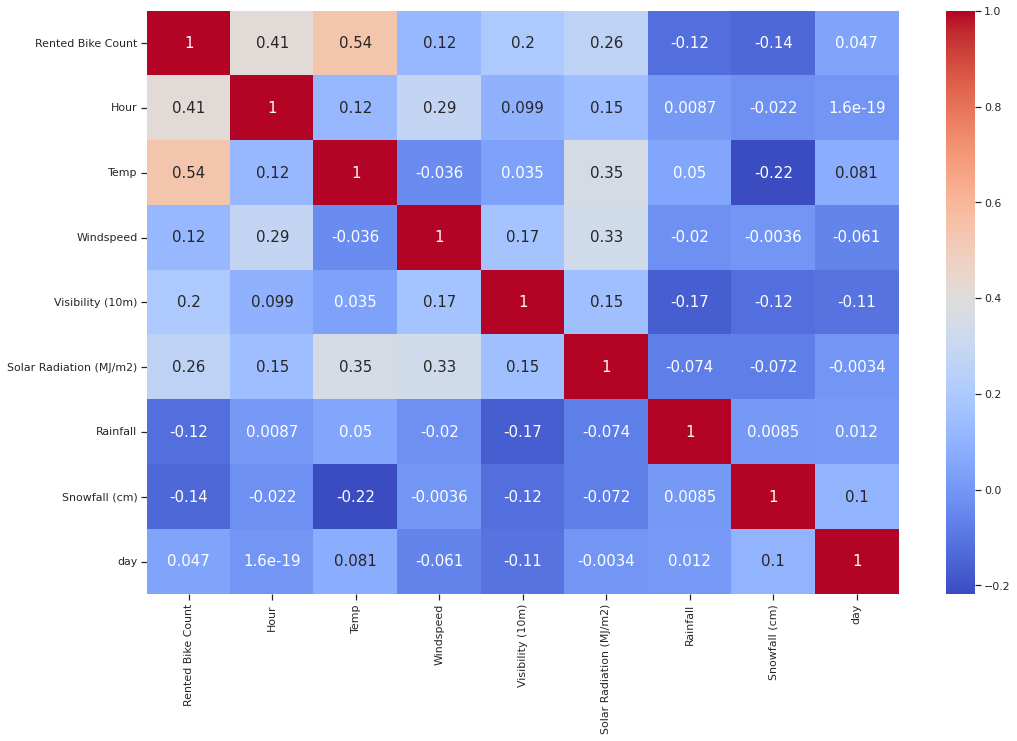

In [315]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [316]:
# One hot encoding
df = pd.get_dummies(df, columns=['Seasons','Holiday','Functioning Day','month_name','day'], prefix=["Seasons","holiday","Functioning_Day","month","day"],drop_first=True)
df.head()


,Rented Bike Count,Hour,Temp,Windspeed,Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_No Holiday,Functioning_Day_Yes,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [317]:
# df_copy = df_copy.drop(['month'], axis = 1)

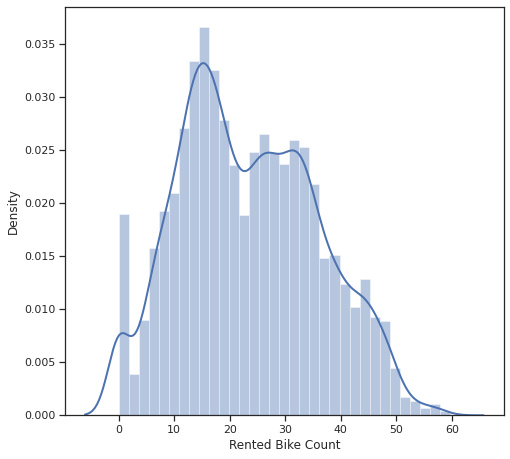

In [318]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']))
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])

#**Test** **Train** **Split**

In [319]:
X = df.drop(['Rented Bike Count'], axis = 1)
y = df['Rented Bike Count']

In [320]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
X = pd.DataFrame(new_df, columns=cols)

In [321]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 10) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)



(7008, 53)
(1752, 53)
(7008,)


# **Model Training**

In [322]:
# Model : LinearRegression(Test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Model : LinearRegression")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('\n')

# Model : LinearRegression(Train)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_train)
print("Model : DecisionTreeRegressor(Test)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_train, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_train, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))


print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : DecisionTreeRegressor(Test)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Model : DecisionTreeRegressor")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('\n')

# Model : DecisionTreeRegressor(Train)
from xgboost import XGBRegressor
dtr = XGBRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_train)
print("Model : DecisionTreeRegressor(Test)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_train, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_train, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : XGBRegressor(Test)
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Model : XGBRegressor(Test)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('\n')

# Model : XGBRegressor(Test)
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_train)
print("Model : XGBRegressor(Train)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_train, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_train, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : RandomForestRegressor(Test)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Model : RandomForestRegressor(Test)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('\n')

# Model : RandomForestRegressor(Train)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 50).fit(X_train, y_train)
y_pred = rf.predict(X_train)
print("Model : RandomForestRegressor(Train)")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_train, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_train, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Model : LinearRegression
MAE : 31.335443994238386
MSE : 53.4722049826639
RMSE : 7.312469144048671
R2 : 0.6578062087556982
Adjusted R2 :  0.6471252482516063


Model : DecisionTreeRegressor(Test)
MAE : 30.772769297933824
MSE : 52.97130423425993
RMSE : 7.278138789158938
R2 : 0.6573119372859224
Adjusted R2 :  0.6547001358300918
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Model : DecisionTreeRegressor
MAE : 10.009432996206097
MSE : 25.26170775733951
RMSE : 5.026102640947507
R2 : 0.8383384497872834
Adjusted R2 :  0.8332924767829996


[17:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model : DecisionTreeRegressor(Test)
MAE : 10.239336024729708
MSE : 20.21782638057934
RMSE : 4.496423732320981
R2 : 0.8692045088410479
Adjusted R2 :  0.8682076493312083
--------------------------------------------

# **Hyperparamter** **Tuning**

In [323]:
rf_h = RandomForestRegressor()
params={

    "n_estimators":[50,100,200,300,400,500,600,700,800,900,1000]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
rf_h_regressor=GridSearchCV(rf_h,param_grid=params,n_jobs=-1)
rf_h_regressor.fit(X_train, y_train)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_
y_pred = rf_h_regressor.predict(X_test)
print("Model : RandomForestRegressor Gridsearch")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model : RandomForestRegressor Gridsearch
MAE : 6.063410646413199
MSE : 13.918457536811829
RMSE : 3.730744903744
R2 : 0.9109292434389304
Adjusted R2 :  0.9081490608136438


In [ ]:
# params={
#     "learning_rate":[0.05,0.10,0.15,0.2,0.25,0.3],
#     "max_depth":[1,4,6,8,10,15] ,
#     "min_child_weight":[1,3,5,7] ,
#     "gamma":[0.1,0.2,0.3,0.4] ,
#     "n_estimators":[100,200,300,400,500]
# }
# from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# r_s=RandomizedSearchCV(m4,param_distributions=params,n_iter=5,n_jobs=-1)
# r_s.fit(train_x,train_y)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_



xgb_h = XGBRegressor()
params={
    "learning_rate":[0.05,0.10,0.15,0.2,0.25,0.3],
    "max_depth":[1,4,6,8,10,15] ,
    "min_child_weight":[1,3,5,7] ,
    "gamma":[0.1,0.2,0.3,0.4] ,
    "n_estimators":[100,200,300,400,500]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
xgb_h_regressor=GridSearchCV(xgb_h,param_grid=params,n_jobs=-1)
xgb_h_regressor.fit(X_train, y_train)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_
y_pred = xgb_h_regressor.predict(X_test)
print("Model : XGBRegressor Gridsearch")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))